In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import os
import csv
import math

from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates

In [2]:
folder_path = r'C:\Users\bangy\Desktop\stock_data'
filtered = 0
total_return = [0 for _ in range(2434)]
factor_matrix = []
pe_matrix = []

for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    if filename.endswith('.csv'):
        df = pd.read_csv(file_path)
        if len(df) < 2434:
            filtered = filtered + 1
            continue

        close_price = df['close'].tolist()
        open_price = df['open'].tolist()
        volume = df['volume'].tolist()
        pettm = df['peTTM'].tolist()

        total_return[0] = total_return[0] + open_price[0]
        for i in range(1, len(close_price)):
            total_return[i] = total_return[i] + close_price[i]
        momentum = []
        pe = []
        days = 4
        while days < len(close_price):
            suspension = False
            for i in range(days-4, days+1):
                if(volume[i] == 0):
                    suspension = True
                    momentum.append(0)
                    pe.append(0)
                    break
            if suspension == False:
                pe.append(pettm[days])
                momentum.append(close_price[days] / open_price[days-4]  - 1)
            days = days + 5
        factor_matrix.append(momentum)
        pe_matrix.append(pe)

print(pe_matrix)


[[4.955532, 4.711731, 4.118127, 4.261228, 4.298328, 4.478529, 4.240028, 4.165827, 4.245328, 4.260984, 4.33277, 4.614784, 4.68657, 5.778736, 5.640292, 5.250599, 5.409553, 5.066008, 5.163431, 5.131453, 4.91477, 4.767031, 4.954167, 4.919694, 5.032961, 4.8409, 4.609443, 4.550348, 4.186008, 4.277107, 4.131349, 4.154123, 4.231558, 4.336322, 4.104019, 4.031139, 3.844386, 0, 4.467133, 4.430667, 4.622115, 4.489925, 4.512716, 4.467133, 4.256391, 4.24766, 4.190908, 4.199639, 4.151619, 4.24766, 4.234564, 3.91588, 3.959535, 3.902783, 3.937708, 4.099232, 4.260757, 4.164715, 4.085934, 4.02684, 3.997293, 4.11126, 4.052166, 4.056387, 4.119702, 4.107039, 4.178796, 3.997293, 4.12869, 4.287173, 4.368447, 4.413147, 4.941425, 5.61193, 5.185245, 5.96547, 6.075189, 6.272041, 6.145093, 6.244271, 5.875328, 5.625398, 5.720609, 5.66507, 5.518286, 5.653168, 6.299811, 6.045143, 6.326774, 6.691704, 7.397764, 7.227199, 7.09468, 6.717762, 6.588197, 6.972967, 6.690279, 7.236024, 0, 0, 6.246616, 6.760951, 6.690279, 6.54

In [4]:
ic_list = []
for j in range(1,len(factor_matrix[0])-1):
    factor_list = []
    return_list = []
    delete_elements = []
    for i in range(len(factor_matrix)):
        factor_list.append(pe_matrix[i][j])
        return_list.append(factor_matrix[i][j+1])
    for k in range(len(factor_list)):
        if factor_list[k] == 0 or return_list[k] == 0:
            delete_elements.append(k)
    delete_elements.sort(reverse=True)
    for elements in delete_elements:
        factor_list.pop(elements)
        return_list.pop(elements)
        
    ic_list.append(np.corrcoef(factor_list, return_list)[0,1])

average_ic = np.mean(ic_list)

# Calculate IR
ir = np.mean(ic_list) / np.std(ic_list)

# Print average IC for each day and IR
print('Average IC Rate:')
print(average_ic)
print('\nIR (Information Ratio):')
print(ir)

Average IC Rate:
0.004622685557020171

IR (Information Ratio):
0.03677548867525677


In [5]:
def MaxDrawdown(return_list):
    
    maxcum = np.zeros(len(return_list))
    b = return_list[0]
    for i in range(0,len((return_list))):
        if (return_list[i]>b):
            b = return_list[i]
        maxcum[i] = b
    
    i = np.argmax((maxcum-return_list)/maxcum) 
    if i == 0:
        return 0
    j = np.argmax(return_list[:i])   

    return (return_list[j]-return_list[i])/return_list[j]

3.661053469487558 0.42348125604654935


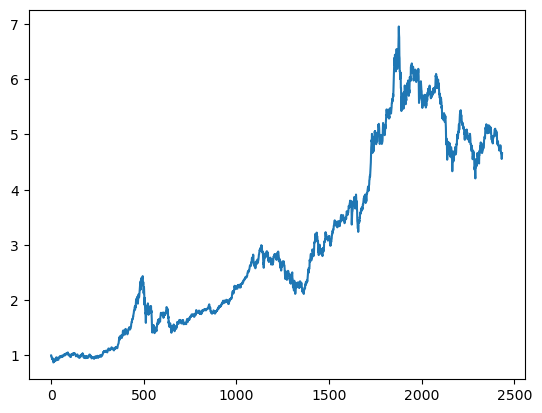

In [6]:
benchmark = total_return[0]
for i in range(len(total_return)):
    total_return[i] = total_return[i] / benchmark
plt.plot(total_return)

print(total_return[-1]-1, MaxDrawdown(total_return))

In [7]:
def get_top_20_percent_indices(lst):
    count = math.ceil(len(lst) * 0.2)
    indices_dict = {value: index for index, value in enumerate(lst)}
    sorted_lst = sorted(lst, reverse=True)
    top_20_percent = sorted_lst[:count]
    top_indices = [indices_dict[value] for value in top_20_percent]
    return top_indices

In [8]:
def get_top_20_to_40_percent_indices(lst):
    length = len(lst)
    start_index = math.ceil(length * 0.2)
    end_index = math.ceil(length * 0.4)
    indices_dict = {value: index for index, value in enumerate(lst)}
    sorted_lst = sorted(lst, reverse=True)
    top_20_to_40_percent = sorted_lst[start_index:end_index]
    top_indices = [indices_dict[value] for value in top_20_to_40_percent]
    return top_indices

In [9]:
def get_top_40_to_60_percent_indices(lst):
    length = len(lst)
    start_index = math.ceil(length * 0.4)
    end_index = math.ceil(length * 0.6)
    indices_dict = {value: index for index, value in enumerate(lst)}
    sorted_lst = sorted(lst, reverse=True)
    top_40_to_60_percent = sorted_lst[start_index:end_index]
    top_indices = [indices_dict[value] for value in top_40_to_60_percent]
    return top_indices

In [10]:
def get_top_60_to_80_percent_indices(lst):
    length = len(lst)
    start_index = math.ceil(length * 0.6)
    end_index = math.ceil(length * 0.8)
    indices_dict = {value: index for index, value in enumerate(lst)}
    sorted_lst = sorted(lst, reverse=True)
    top_60_to_80_percent = sorted_lst[start_index:end_index]
    top_indices = [indices_dict[value] for value in top_60_to_80_percent]
    return top_indices

In [11]:
def get_bottom_20_percent_indices(lst):
    count = math.ceil(len(lst) * 0.2)
    indices_dict = {value: index for index, value in enumerate(lst)}
    sorted_lst = sorted(lst)
    bottom_20_percent = sorted_lst[:count]
    bottom_indices = [indices_dict[value] for value in bottom_20_percent]
    return bottom_indices

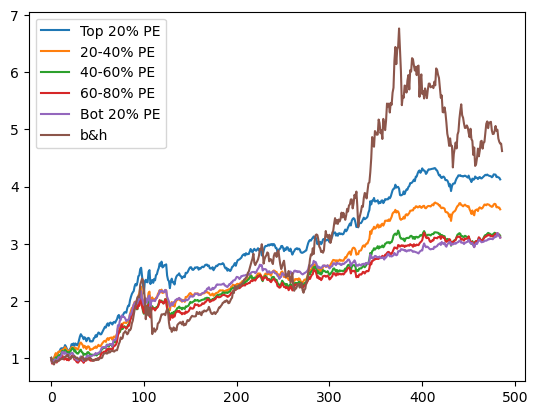

In [17]:
total_return_1 = [1]
total_return_2 = [1]
total_return_3 = [1]
total_return_4 = [1]
total_return_5 = [1]

for j in range(1,len(pe_matrix[0])-1):
    factor_list = []
    return_list = []
    delete_elements = []
    for i in range(len(factor_matrix)):
        factor_list.append(pe_matrix[i][j])
        return_list.append(factor_matrix[i][j+1])
    for k in range(len(factor_list)):
        if factor_list[k] == 0 or return_list[k] == 0:
            delete_elements.append(k)
    delete_elements.sort(reverse=True)
    for elements in delete_elements:
        factor_list.pop(elements)
        return_list.pop(elements)

    today_return = total_return_1[-1]
    selected_stock = get_top_20_percent_indices(factor_list)
    for k in selected_stock:
        today_return = today_return + (return_list[k] / len(selected_stock))
    today_return = today_return - 0.0002
    total_return_1.append(today_return)

    today_return = total_return_2[-1]
    selected_stock = get_top_20_to_40_percent_indices(factor_list)
    for k in selected_stock:
        today_return = today_return + (return_list[k] / len(selected_stock))
    today_return = today_return - 0.0002
    total_return_2.append(today_return)

    today_return = total_return_3[-1]
    selected_stock = get_top_40_to_60_percent_indices(factor_list)
    for k in selected_stock:
        today_return = today_return + (return_list[k] / len(selected_stock))
    today_return = today_return - 0.0002
    total_return_3.append(today_return)

    today_return = total_return_4[-1]
    selected_stock = get_top_60_to_80_percent_indices(factor_list)
    for k in selected_stock:
        today_return = today_return + (return_list[k] / len(selected_stock))
    today_return = today_return - 0.0002
    total_return_4.append(today_return)

    today_return = total_return_5[-1]
    selected_stock = get_bottom_20_percent_indices(factor_list)
    for k in selected_stock:
        today_return = today_return + (return_list[k] / len(selected_stock))
    today_return = today_return - 0.0002
    total_return_5.append(today_return)


sampling_rate = len(total_return) // len(total_return_5)

sampled_list = total_return[::sampling_rate]

plt.plot(total_return_1, label='Top 20% PE')
plt.plot(total_return_2, label='20-40% PE')
plt.plot(total_return_3, label='40-60% PE')
plt.plot(total_return_4, label='60-80% PE')
plt.plot(total_return_5, label='Bot 20% PE')
plt.plot(sampled_list, label='b&h')
plt.legend()
plt.show()


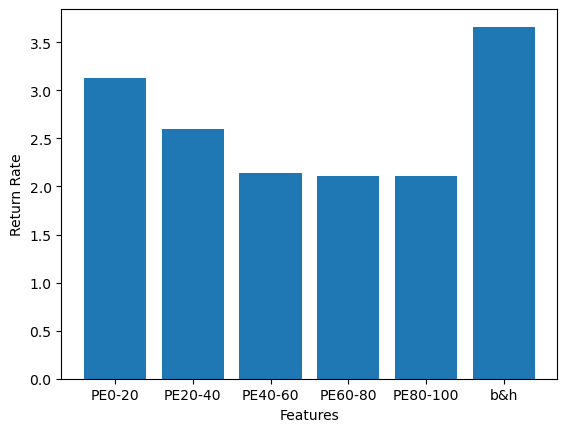

In [16]:
import matplotlib.pyplot as plt

data = [total_return_1[-1]-1, total_return_2[-1]-1, total_return_3[-1]-1, total_return_4[-1]-1, total_return_5[-1]-1, total_return[-1]-1]
labels = ['PE0-20', 'PE20-40', 'PE40-60', 'PE60-80', 'PE80-100', 'b&h']

plt.bar(range(len(data)), data, tick_label=labels)

# Adding labels and title
plt.xlabel('Features')
plt.ylabel('Return Rate')


# Displaying the histogram
plt.show()



In [35]:
def get_bottom_percent_indices(lst, per):
    count = math.ceil(len(lst) * per)
    indices_dict = {value: index for index, value in enumerate(lst)}
    sorted_lst = sorted(lst)
    bottom_20_percent = sorted_lst[:count]
    bottom_indices = [indices_dict[value] for value in bottom_20_percent]
    return bottom_indices

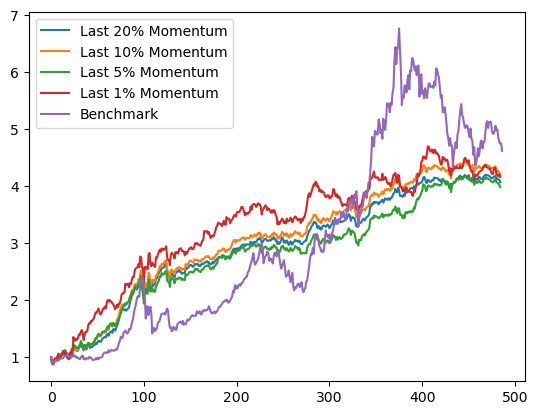

In [39]:
total_return_1 = [1]
total_return_2 = [1]
total_return_3 = [1]
total_return_4 = [1]

sampling_rate = len(total_return) // len(total_return_5)

sampled_list = total_return[::sampling_rate]

for j in range(1,len(factor_matrix[0])-1):
    factor_list = []
    return_list = []
    delete_elements = []
    for i in range(len(factor_matrix)):
        factor_list.append(factor_matrix[i][j])
        return_list.append(factor_matrix[i][j+1])
    for k in range(len(factor_list)):
        if factor_list[k] == 0 or return_list[k] == 0:
            delete_elements.append(k)
    delete_elements.sort(reverse=True)
    for elements in delete_elements:
        factor_list.pop(elements)
        return_list.pop(elements)

    today_return = total_return_1[-1]
    selected_stock = get_bottom_percent_indices(factor_list, 0.2)
    for k in selected_stock:
        today_return = today_return + (return_list[k] / len(selected_stock))
    today_return = today_return - 0.0002
    total_return_1.append(today_return)

    today_return = total_return_2[-1]
    selected_stock = get_bottom_percent_indices(factor_list, 0.1)
    for k in selected_stock:
        today_return = today_return + (return_list[k] / len(selected_stock))
    today_return = today_return - 0.0002
    total_return_2.append(today_return)

    today_return = total_return_3[-1]
    selected_stock = get_bottom_percent_indices(factor_list, 0.05)
    for k in selected_stock:
        today_return = today_return + (return_list[k] / len(selected_stock))
    today_return = today_return - 0.0002
    total_return_3.append(today_return)

    today_return = total_return_4[-1]
    selected_stock = get_bottom_percent_indices(factor_list, 0.01)
    for k in selected_stock:
        today_return = today_return + (return_list[k] / len(selected_stock))
    today_return = today_return - 0.0002
    total_return_4.append(today_return)


# Plot both lists
plt.plot(total_return_1, label='Last 20% Momentum')
plt.plot(total_return_2, label='Last 10% Momentum')
plt.plot(total_return_3, label='Last 5% Momentum')
plt.plot(total_return_4, label='Last 1% Momentum')
plt.plot(sampled_list, label='Benchmark')
plt.legend()
plt.show()